<a href="https://colab.research.google.com/github/manoharpavuluri/dl-cnn-imageClassification-CIFAR/blob/main/dl_cnn_imageClassification_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

training samples are 50000, each of 32x32 size and 3 is for RGB channels

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[0].shape

(32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
classes = ["airplace", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train.shape

(50000, 1)

its a 2 dimensional array but cnn takes single dimensional array. lets transform.
so below lets use numpy's reshape. first is 50000, which you want to keep it as it is. so when you specify -1, no transformation happens. and when you specify blank, it transforms from 2 to 1 dimension.

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

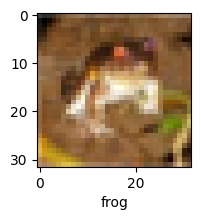

In [11]:
plot_sample(X_train, y_train, 0)

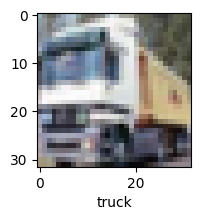

In [12]:
plot_sample(X_train, y_train, 1)

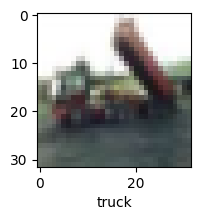

In [13]:
plot_sample(X_train, y_train, 2)

In [14]:
X_train[:1]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [15]:
# lets normalize the data, by deviding the 255 which is highest value in rgb value

X_train = X_train/255
X_test = X_test/255

In [16]:
X_train[:1]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

lets do artificial neural network before we move to cnn

In [17]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8145 - accuracy: 0.3529
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6265 - accuracy: 0.4281
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5425 - accuracy: 0.4586
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4830 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4344 - accuracy: 0.4960


reason for using sparse_categorical_crossentropy - when we use a index rather 0 and 1

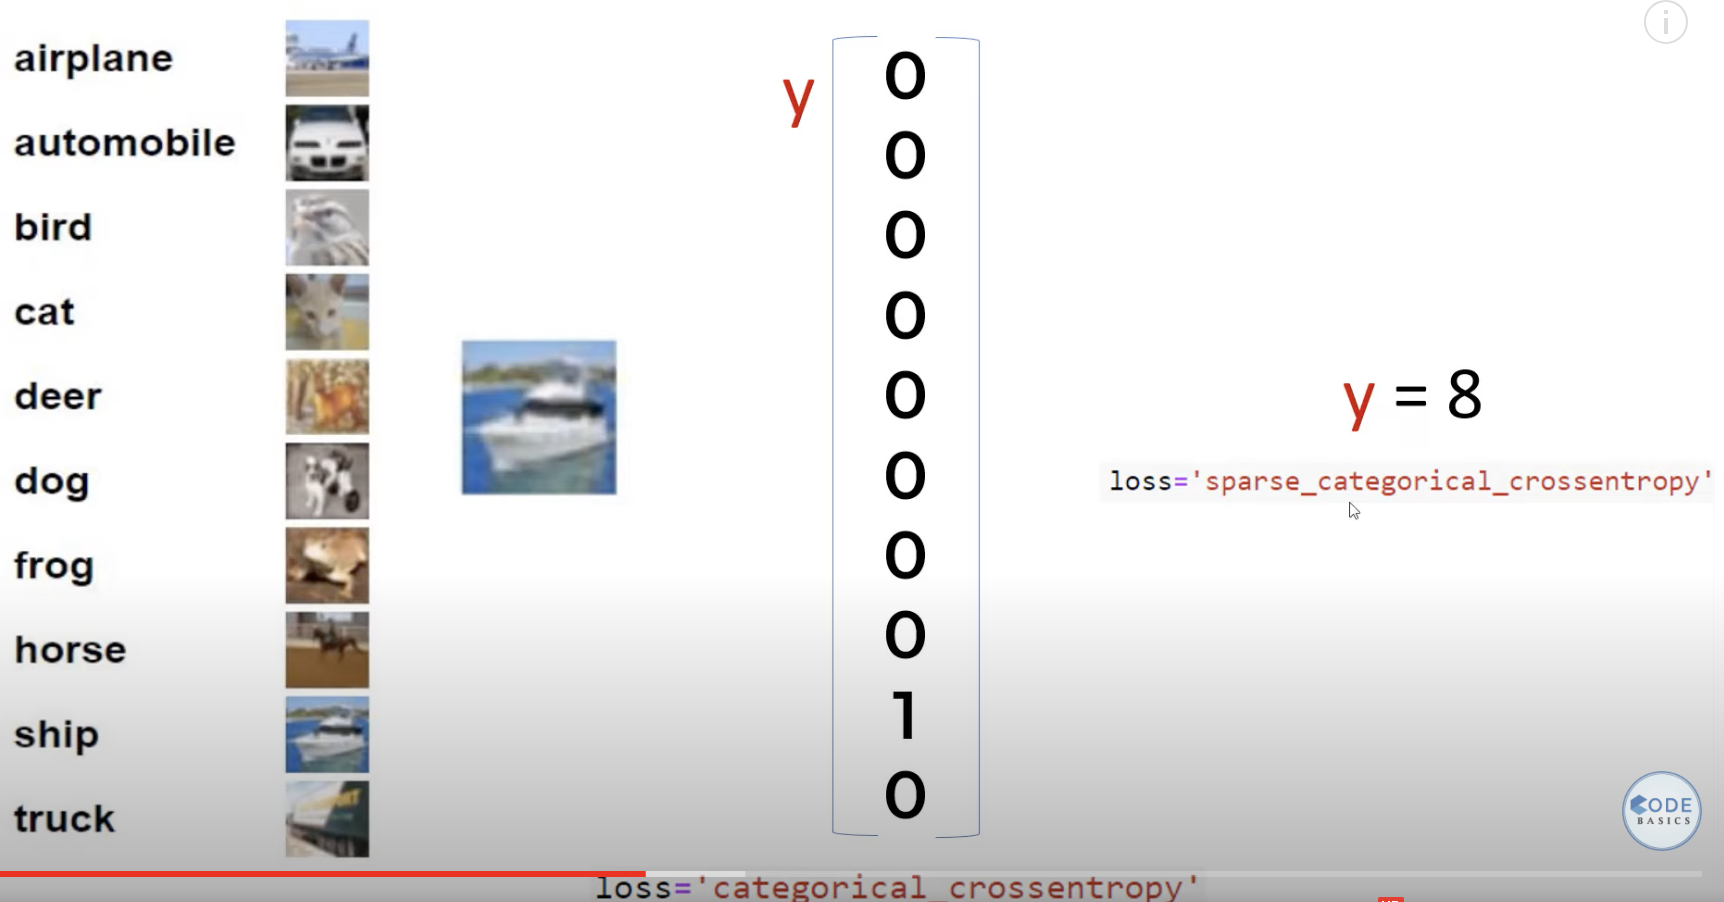

In [18]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4443 - accuracy: 0.4848


[1.4443199634552002, 0.4848000109195709]

as you can see ann is performing bad with 48% accuracy with 5 epochs

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classs = [np.argmax(element) for element in y_pred]

print("\n Classification Report: \n", classification_report(y_test,y_pred_classs))



313/313 [==============================] - 1s 2ms/step

 Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.42      0.51      1000
           1       0.66      0.53      0.59      1000
           2       0.36      0.41      0.38      1000
           3       0.36      0.30      0.33      1000
           4       0.49      0.36      0.42      1000
           5       0.39      0.35      0.37      1000
           6       0.47      0.63      0.54      1000
           7       0.51      0.58      0.54      1000
           8       0.47      0.76      0.58      1000
           9       0.56      0.51      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



Classification report is  giving Precision, recall, f1-score for each of the 9 classes (airplane to truck)

CNN 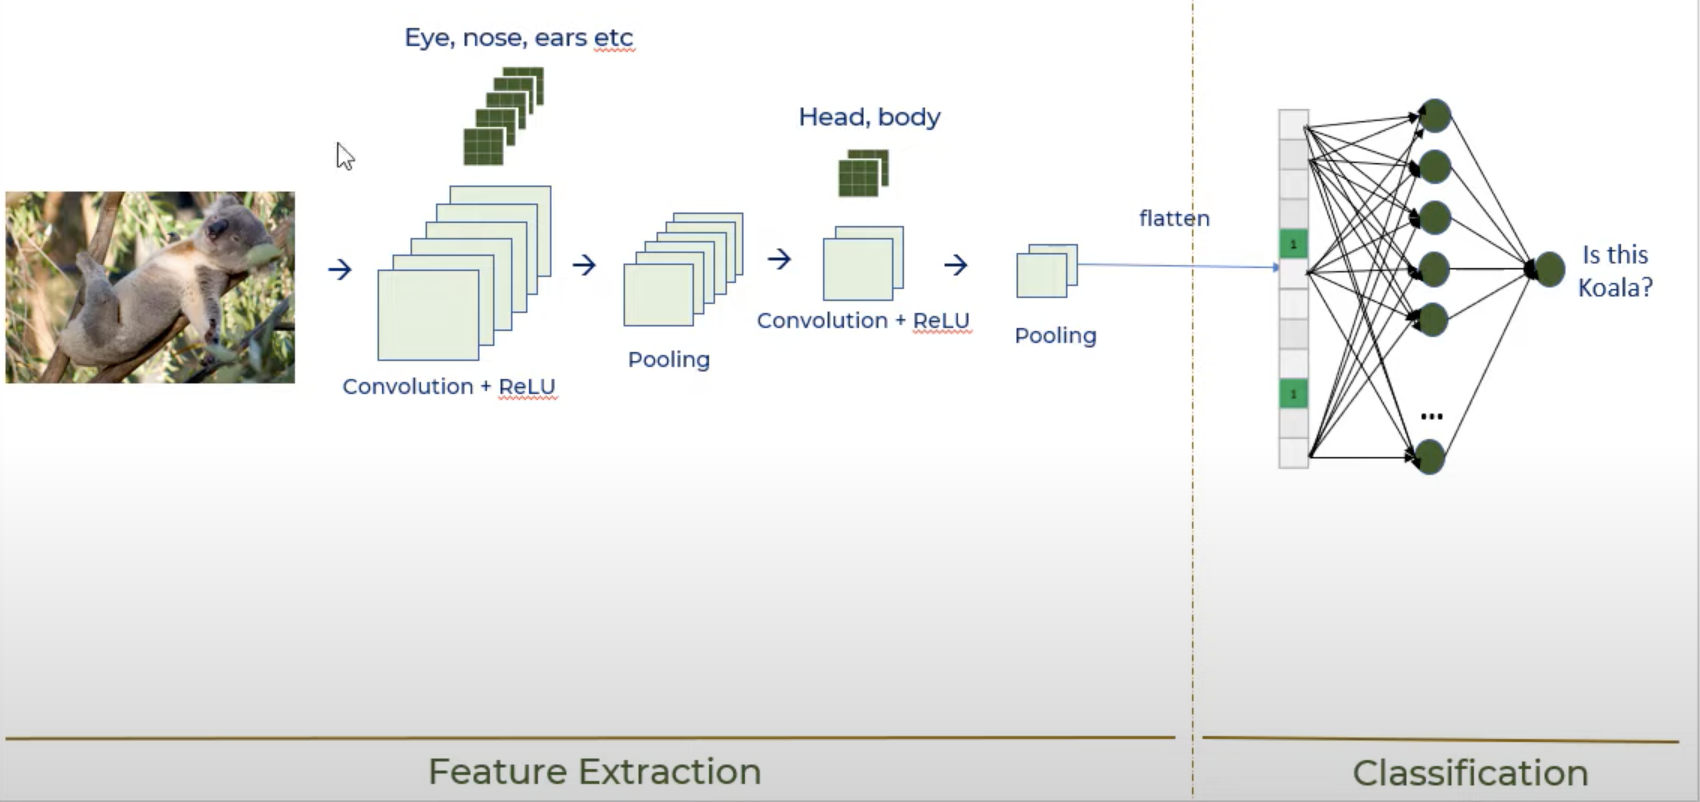

Classification where you add ann( or dence network)

> CNN, as in the image, is a mix of cnn network and dense network.
> and since CNN takes care of most of heavy liftning, you dont need that many layers and neurons in dense network
> when you are in the middle layer you dont need to define the shape, the network can figure it out
> we will use softmax activation function. softmax

In [ ]:
cnn = models.Sequential([


     #dense /ann
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs = 5)